In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img)

In [3]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [4]:
# 图像梯度计算的是图像变化的速度
# 图像边缘部分，其灰度值变化较大，梯度值较大，平滑部分反之，一半图像梯度计算图像边缘部分
# 图像梯度通过计算像素值差得到梯度的近似值

# 9.1 Sobel理论基础

In [5]:
# sobel算子是一种离散的微分算子，结合了高斯平滑和微分求导运算，利用局部查分寻找边缘，计算得到的是一个梯度的近似值
# 算子也就是滤波器，核，掩模，模版，窗口等
# 像素值等于原始像素及周围像素的加权和，这种滤波器就是线性滤波器
# sobel算子：
# -1 0 1    -1 -2 -1
# -2 0 2     0  0  0
# -1 0 1     1  2  1

# 假定有原始图像src，下面对sobel算子的计算过程进行讨论：
# 1.计算水平方向偏导数的近似值
# 将sobel算子与原始图像src进行卷积运算，可以计算水平方向上的像素值变化情况。
# 例如，当sebel算子大小位3*3时，水平方向偏导数Gx的计算方式位：
# Gx = [[-1 0 1],[-2 0 2],[ 1 0 1]] * src
# 将src写成九个像素点：
#      [-1 0 1]   [p1 p2 p3]
# Gx = [-2 0 2] * [p4 p5 p6]
#      [ 1 0 1]   [p7 p8 p9]
# 如果计p5水平方向偏导数p5x，则需要利用sobel算子及p5邻域点，使公式为：
# P5x = (p3-p1) + 2*(p6-p4) + (p9-p7)
# 即用p5像素点右侧的像素值减p5左侧像素值，其中中间像素（p6，p4）距离p5较近，其像素差值权重为2，其余为1

# 2.计算垂直方向偏导数的近似值
# 将sobel算子与原始图像src进行卷积运算，可以计算垂直方向上的像素值变化情况。
# 例如，当sebel算子大小位3*3时，水平方向偏导数Gx的计算方式位：
# Gy = [[-1 0 1],[-2 0 2],[ 1 0 1]] * src
# 将src写成九个像素点：
#      [-1 -2 -1]   [p1 p2 p3]
# Gy = [ 0  0  0] * [p4 p5 p6]
#      [ 1  2  1]   [p7 p8 p9]
# 如果计p5垂直方向偏导数p5x，则需要利用sobel算子及p5邻域点，使公式为：
# P5y = (p7-p1) + 2*(p8-p2) + (p9-p3)
# 即用p5像素点下行的像素值减p5上行像素值，其中中间像素（p8，p2）距离p5较近，其像素差值权重为2，其余为1

# 9.2 Sobel算子及函数使用

In [6]:
# opencv中使用函数cv2.Sobel()实现Sobel算子运算：
# dst = cv2.Sobel(src,ddepth,dx,dy[ksize[,scale[,delta[,borderType]]]])
# dst：目标图像
# src：原始图像
# ddepth：输出图像深度，见书P191
# dx：x方向上的求导阶数
# dy：y方向上的求导阶数
# ksize：Sobel核的大小，值为-1时，则会使用Scharr算子进行计算
# scale：计算导数值时采用的缩放因子，默认为1，没有缩放
# delta：加在图像dst上的值，可选，默认为0
# borderType：边界样式，见书P192

### 9.2.1 参数ddepth

In [7]:
# cv2.Sobel()语法规定，ddepth值可设为-1，让处理结果与原始图像保持一致，但如果直接将参数的depth值设-1，计算结果可能时错的
# 实际操作中，计算梯度值可能出现负数，如果处理图像是8位图类型，的depth为-1，意味着指定运算结果也是8位图类型，那么所有负数会自动截断为0
# 发生信息丢失。为避免信息丢失，在计算时要使用更高的数据类型cv2.CV_64F,再通过取绝对值将其映射为cv2.CV_8U类型（8位图）
# 所以通常将cv2.Sobel()内参数的depth的值设为cv2.CV_64F

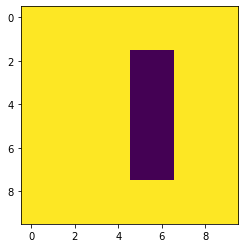

In [8]:
# 如下图，黑色条计算垂直边缘，左侧：0-1=-1，右侧：1-0=1，8位图-1会自动处理成0，丢失左侧垂直边缘信息
img = np.ones([10,10],dtype=np.uint8)
img[2:8,5:7] = 0
img_show(img)

In [9]:
img

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [10]:
# 为了得到结果为正数的偏导数，需要对计算的偏导数取绝对值
# |P5x| = |(p3-p1) + 2*(p6-p4) + (p9-p7)|
# |P5y| = |(p7-p1) + 2*(p8-p2) + (p9-p3)|
# 需要时还可进行如下处理：
# P5Sobel = ｜P5x｜+｜P5y｜ = |(p3-p1) + 2*(p6-p4) + (p9-p7)| + |(p7-p1) + 2*(p8-p2) + (p9-p3)|

# 在opencv中使用cv2.convertScaleAbs()对参数取绝对值：
# dst = cv2.convertScaleAbs(src[,alpha[,beta]])
# dst：处理结果
# src：原始图像
# alpha：调节系数，可选，默认1
# beta：调节亮度值，默认0

# 这里，该函数的作用是将原始图像src转换为256色位图
# dst = saturate(src*alpha+beta)
# saturate()表示计算结果的最大值是饱和值，极当src*alpha+beta>255时，取255

In [11]:
# 使用函数cv2.convertScaleAbs()对一个随机数取绝对值
img = np.random.randint(-256,256,size=[4,5],dtype=np.int16)
rst = cv2.convertScaleAbs(img)
print("img\n",img)
print("rst\n",rst)

img
 [[  88  -66  -10 -187  238]
 [  83  -29  241 -191 -187]
 [  17  253 -133  202 -153]
 [ 119   10   74  177  252]]
rst
 [[ 88  66  10 187 238]
 [ 83  29 241 191 187]
 [ 17 253 133 202 153]
 [119  10  74 177 252]]


### 9.2.2 方向

In [12]:
# 在函数cv2.Sobel()中，dx表示x轴方向的求导阶数；dy表示y轴方向的求导阶数
# 参数dx和dy通常值为0或1，最大值为2。如果是0，表示该方向上没有求导，不能同时为0

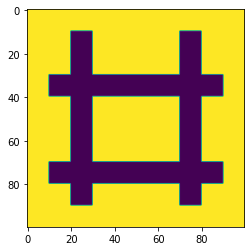

In [13]:
img = np.ones([100,100],dtype=np.uint8)
img[10:90,20:30] = 0
img[10:90,70:80] = 0
img[30:40,10:90] = 0
img[70:80,10:90] = 0
img_show(img)

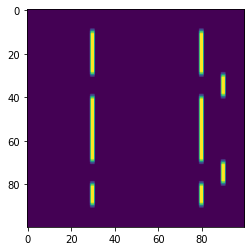

In [14]:
# 信息丢失
sobelx = cv2.Sobel(img,-1,1,0)
img_show(sobelx)

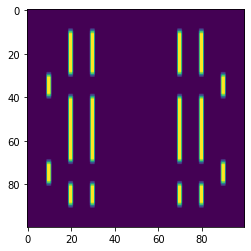

In [15]:
# 1.计算x方向边缘（梯度）：dx=1，dy=0
# dst = cv2.Sobel(src,ddepth,1,0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0)
sobelx = cv2.convertScaleAbs(sobelx)
img_show(sobelx)

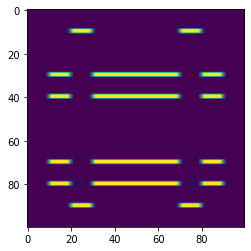

In [16]:
# 2.计算y方向边缘（梯度）：dx=0，dy=1
# dst = cv2.Sobel(src,ddepth,0,1)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1)
sobely = cv2.convertScaleAbs(sobely)
img_show(sobely)

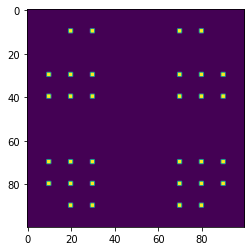

In [17]:
# 3.dx,dy均为1：dx=1，dy=1
# dst = cv2.Sobel(src,ddepth,1,1)
sobelxy = cv2.Sobel(img,cv2.CV_64F,1,1)
sobelxy = cv2.convertScaleAbs(sobelxy)
img_show(sobelxy)

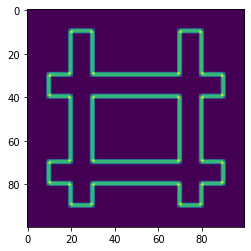

In [18]:
# 4.计算x方向和y方向的边缘叠加
# dx = cv2.Sobel(src,ddepth,0,1)
# dy = cv2.Sobel(src,ddepth,1,0)
# dst = cv2.addWeighted(src1,alpha,src2,beta,gamma)
dx = cv2.Sobel(img,cv2.CV_64F,1,0)
dy = cv2.Sobel(img,cv2.CV_64F,0,1)
dx = cv2.convertScaleAbs(dx)
dy = cv2.convertScaleAbs(dy)
dxy = cv2.addWeighted(dx,0.5,dy,0.5,0)
img_show(dxy)

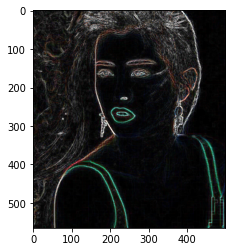

In [19]:
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
dx = cv2.Sobel(wzx,cv2.CV_64F,1,0)
dy = cv2.Sobel(wzx,cv2.CV_64F,0,1)
dx = cv2.convertScaleAbs(dx)
dy = cv2.convertScaleAbs(dy)
dxy = cv2.addWeighted(dx,0.5,dy,0.5,0)

dxy11 = cv2.Sobel(wzx,cv2.CV_64F,1,1)
dxy11 = cv2.convertScaleAbs(dxy11)

img_show(dxy)

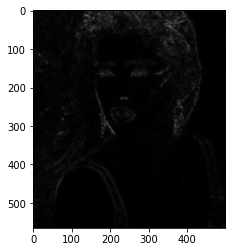

In [20]:
img_show(dxy11)

# 9.3 Scharr算子及函数使用

In [21]:
# opencv提供了Scharr算子，与Sobel算子同样的速度，切精度更高，可将Scharr算子看成是Sobel算子的该进，其核通常为：
#      [-3  0  3]        [-3 -10  -3]
# Gx = [-10 0 10]   Gy = [ 0   0   0]
#      [-3  0  3]        [ 3  10   3]

# opencv提供函数cv2.Scharr()来计算Scharr算子：
# dst = cv2.Scharr(src,ddepth,dx,dy[,scale[,delta[,borderType]]])
# dst：输出图像
# src：输入图像
# ddepth：输出图像深度。与Sobel中参数含义相同
# dx：x方向上的导数阶数
# dy：y方向上的导数阶数
# scale：计算导数值的缩放因子，可选，默认1，不缩放
# delta：加到目标图像上的亮度值，可选，默认0
# borderType：比娜姐样式

# cv2.Sobel()中介绍过，如果ksize=-1，则会用Scharr滤波器，因此如下语句是等价的：
# dst = cv2.Scharr(src,ddepth,dx,dy)
# dst = cv2.Sobel(src,ddepth,dx,dy,-1)

# cv2.Scharr()和cv2.Sobel()使用方式基本一致
# 注意的depth值应设为cv2.CV64F,并对cv2.Scharr()计算结果取绝对值，才能保证正确处理结果：
# dst = cv2.Scharr(src,ddepth,dx,dy)
# dst = cv2.convertScaleAbs(dst)
# 另外注意：cv2.Scharr()中，要求dx和dy满足条件：
# dx>=0 && dy>=0 && dx+dy=1

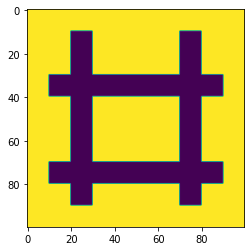

In [22]:
img = np.ones([100,100],dtype=np.uint8)
img[10:90,20:30] = 0
img[10:90,70:80] = 0
img[30:40,10:90] = 0
img[70:80,10:90] = 0
img_show(img)

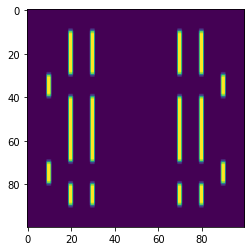

In [23]:
# 1.计算x方向边缘（梯度）：dx=1，dy=0
dx = cv2.Scharr(img,cv2.CV_64F,1,0)
dx = cv2.convertScaleAbs(dx)
img_show(dx)

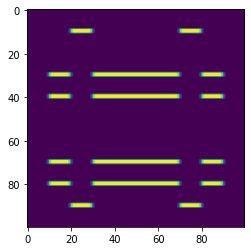

In [24]:
# 1.计算y方向边缘（梯度）：dx=0，dy=1
dy = cv2.Scharr(img,cv2.CV_64F,0,1)
dy = cv2.convertScaleAbs(dy)
img_show(dy)

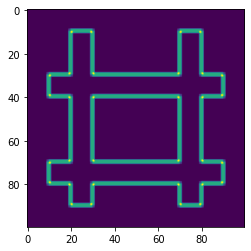

In [25]:
# 1.计算x方向和y方向的边缘叠加：
# 注意，dx，dy不能同时为1
dx = cv2.Scharr(img,cv2.CV_64F,1,0)
dy = cv2.Scharr(img,cv2.CV_64F,0,1)
dx = cv2.convertScaleAbs(dx)
dy = cv2.convertScaleAbs(dy)
dxy = cv2.addWeighted(dx,0.5,dy,0.5,0)
img_show(dxy)

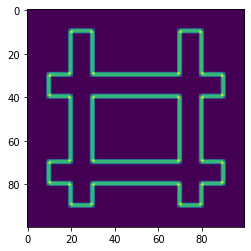

In [26]:
# 使用函数cv2.Sobel()完成Scharr算子运算
dx = cv2.Sobel(img,cv2.CV_64F,1,0)
dy = cv2.Sobel(img,cv2.CV_64F,0,1)
dx = cv2.convertScaleAbs(dx)
dy = cv2.convertScaleAbs(dy)
dxy = cv2.addWeighted(dx,0.5,dy,0.5,0)
img_show(dxy)

# 9.4 Sobel算子和Scharr算子的比较

In [27]:
# Sobel算子的缺点是，当其核结构较小时，精度不够高，而Scharr算子具有更高的精度

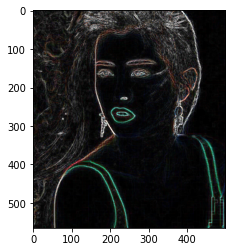

In [28]:
# 分别使用Sobel算子和Scharr算子计算一幅图像的水平和垂直边缘的叠加信息
wzx = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wzx.jpg")
# Sobel
dx = cv2.Sobel(wzx,cv2.CV_64F,1,0)
dy = cv2.Sobel(wzx,cv2.CV_64F,0,1)
dx = cv2.convertScaleAbs(dx)
dy = cv2.convertScaleAbs(dy)
dxy = cv2.addWeighted(dx,0.5,dy,0.5,0)
# Scharr
dx1 = cv2.Scharr(wzx,cv2.CV_64F,1,0)
dy1 = cv2.Scharr(wzx,cv2.CV_64F,0,1)
dx1 = cv2.convertScaleAbs(dx1)
dy1 = cv2.convertScaleAbs(dy1)
dxy1 = cv2.addWeighted(dx1,0.5,dy1,0.5,0)

img_show(dxy)

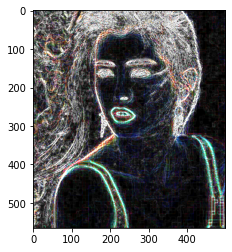

In [29]:
img_show(dxy1)

# 9.5 Laplacian算子及函数使用

In [30]:
# Laplacian（拉普拉斯）算子是一种二阶导数算子，具有旋转不变性，可以满足不同方向的图像边缘锐化（边缘检测）要求
# 其算子的系数之和=0:
# 算子：         图像：
# [0  1  0]     [p1 p2 p3]
# [1 -4  1]     [p4 p5 p6]
# [0  1  0]     [p7 p8 p9]
# 计算p5的近似导数值：
# p5lap = （p2+p4+p6+p8)-4*p5
# 注意，上述计算结果可能是负数，需取绝对值；结果值越大

# opencv中使用函数cv2.Laplacian()实现Laplacian算子的计算：
# dst = cv2.Laplacian(src,ddepth[,ksize[,scale[,delta[,borderType]]]])
# dst：目标图像
# src：原始图像
# ddepth：目标图像深度
# ksize：用于计算二阶导数的核尺寸大小，必须是正奇数
# scale：计算Laplacian值的缩放比例因子，可选，默认1，不缩放
# delta：加到目标图像上的可选值，默认0
# borderType：边界样式

# 该函数分别对x，y方向进行二次求导：
# dst = ∆src = ∂^2src/∂x^2 + ∂^2src/∂y^2
# 上式是当ksize值大于1的情况，当ksize的值为1时，Laplacian算子计算时采用3*3的核：
#  [0  1  0]
#  [1 -4  1]
#  [0  1  0]
# 通过从图像内减去它的Laplacian图像，可以增强图像的对比度，此算子如同所示：
# 扩展算子：
#  [0  1  0]
#  [1 -5  1]
#  [0  1  0]

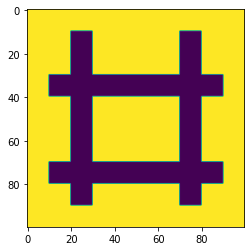

In [31]:
img = np.ones([100,100],dtype=np.uint8)
img[10:90,20:30] = 0
img[10:90,70:80] = 0
img[30:40,10:90] = 0
img[70:80,10:90] = 0
img_show(img)

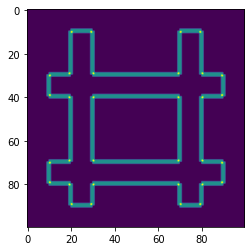

In [32]:
# 利用Laplacian计算图像边缘信息
laplacian = cv2.Laplacian(img,cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)
img_show(laplacian)

# 9.6 算子总结

In [33]:
# Sobel，Scharr，Laplacian算子都可以用作边缘检测
# Sobel：
# [-1 0 1]   [-1 -2 -1]
# [-2 0 2]   [ 0  0  0]
# [-1 0 1]   [ 1  2  1]
# Scharr:
# [ -3 0 -3]  [-3 -10 -3]
# [-10 0 10]  [ 0   0  0]
# [ -3 0  3]  [ 3  10  3]
# Laplacian:
# [0  1  0]
# [1 -4  1]
# [0  1  0]

# Sobel算子和Scharr算子都是一阶近似导数，通常可将它们表示为：
# Sobel = ｜左-右｜/｜下-上｜
# Scharr = ｜左-右｜/｜下-上｜
# ｜左-右｜表示左侧像素减右侧像素结果的绝对值，同理

# Laplacian算子计算的是二阶近似导数，通常可将它们表示为：
# Laplacian = ｜左-右｜+｜左-右｜+｜下-上｜+｜下-上｜

# 通过公式发现，Sobel，Scharr算子进行了一次｜左-右｜和｜下-上｜的值
# Laplacian算子进行了两次｜左-右｜和｜下-上｜的值